In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import linear_model
# from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [32]:
df = pd.read_csv('/Users/djdit/OneDrive - University of South Florida/Project/Data/data.csv', parse_dates=['wk_strt_dt'], index_col='wk_strt_dt')

In [33]:
print(df.shape)
df.head()

(209, 79)


yr_nbr  qtr_nbr  prd  wk_nbr  wk_in_yr_nbr   mdip_dm  mdip_inst  \
wk_strt_dt                                                                    
2014-08-03    2014        3    7       1            27   4863885   29087520   
2014-08-10    2014        3    7       2            28  20887502    8345120   
2014-08-17    2014        3    7       3            29  11097724   17276800   
2014-08-24    2014        3    7       4            30   1023446   18468480   
2014-08-31    2014        3    8       1            31  21109811   26659920   

            mdip_nsp  mdip_auddig  mdip_audtr  ...  seas_prd_12  seas_week_40  \
wk_strt_dt                                     ...                              
2014-08-03   2421933       692315    37778097  ...            0             0   
2014-08-10   3984494       475810    12063657  ...            0             0   
2014-08-17   1846832       784732     5770115  ...            0             0   
2014-08-24   2394834      1032301    12174000  ...            0             0   
2014-08-31   3312008       400456    31656134  ...            0             0   

            seas_week_41  seas_week_42  seas_week_43  seas_week_44  \
wk_strt_dt                                                           
2014-08-03             0             0             0             0   
2014-08-10             0             0             0             0   
2014-08-17             0             0             0             0   
2014-08-24             0             0             0             0   
2014-08-31             0             0             0             0   

            seas_week_45  seas_week_46  seas_week_47  seas_week_48  
wk_strt_dt                                                          
2014-08-03             0             0             0             0  
2014-08-10             0             0             0             0  
2014-08-17             0             0             0             0  
2014-08-24             0             0             0             0  
2014-08-31             0             0             0             0  

[5 rows x 79 columns]

In [34]:
pd.set_option('display.max_rows', 80)
df.dtypes

yr_nbr                        int64
qtr_nbr                       int64
prd                           int64
wk_nbr                        int64
wk_in_yr_nbr                  int64
mdip_dm                       int64
mdip_inst                     int64
mdip_nsp                      int64
mdip_auddig                   int64
mdip_audtr                    int64
mdip_vidtr                    int64
mdip_viddig                   int64
mdip_so                       int64
mdip_on                       int64
mdip_em                       int64
mdip_sms                      int64
mdip_aff                      int64
mdip_sem                      int64
mdsp_dm                     float64
mdsp_inst                   float64
mdsp_nsp                    float64
mdsp_auddig                 float64
mdsp_audtr                  float64
mdsp_vidtr                  float64
mdsp_viddig                 float64
mdsp_so                     float64
mdsp_on                     float64
mdsp_sem                    

In [35]:
df.describe()

yr_nbr     qtr_nbr         prd      wk_nbr  wk_in_yr_nbr  \
count   209.000000  209.000000  209.000000  209.000000    209.000000   
mean   2016.004785    2.507177    6.526316    2.703349     26.626794   
std       1.226697    1.122838    3.465562    1.274015     15.119856   
min    2014.000000    1.000000    1.000000    1.000000      1.000000   
25%    2015.000000    2.000000    4.000000    2.000000     14.000000   
50%    2016.000000    3.000000    7.000000    3.000000     27.000000   
75%    2017.000000    4.000000   10.000000    4.000000     40.000000   
max    2018.000000    4.000000   12.000000    5.000000     53.000000   

            mdip_dm     mdip_inst      mdip_nsp   mdip_auddig    mdip_audtr  \
count  2.090000e+02  2.090000e+02  2.090000e+02  2.090000e+02  2.090000e+02   
mean   9.544510e+06  1.247717e+07  1.616957e+06  1.002816e+06  2.295103e+07   
std    8.293082e+06  1.024959e+07  2.203341e+06  8.122848e+05  1.567124e+07   
min    0.000000e+00  4.853300e+04  0.000000e+00  1.561800e+04  0.000000e+00   
25%    2.087021e+06  5.304240e+06  2.542340e+05  4.577220e+05  1.236705e+07   
50%    7.664954e+06  8.911466e+06  8.870720e+05  8.061170e+05  1.910160e+07   
75%    1.533852e+07  1.786920e+07  2.248483e+06  1.344765e+06  2.956004e+07   
max    3.979871e+07  6.545146e+07  1.553181e+07  5.418819e+06  9.066538e+07   

       ...  seas_prd_12  seas_week_40  seas_week_41  seas_week_42  \
count  ...   209.000000    209.000000    209.000000    209.000000   
mean   ...     0.081340      0.019139      0.019139      0.019139   
std    ...     0.274012      0.137342      0.137342      0.137342   
min    ...     0.000000      0.000000      0.000000      0.000000   
25%    ...     0.000000      0.000000      0.000000      0.000000   
50%    ...     0.000000      0.000000      0.000000      0.000000   
75%    ...     0.000000      0.000000      0.000000      0.000000   
max    ...     1.000000      1.000000      1.000000      1.000000   

       seas_week_43  seas_week_44  seas_week_45  seas_week_46  seas_week_47  \
count    209.000000    209.000000    209.000000    209.000000    209.000000   
mean       0.019139      0.019139      0.019139      0.019139      0.019139   
std        0.137342      0.137342      0.137342      0.137342      0.137342   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

       seas_week_48  
count    209.000000  
mean       0.019139  
std        0.137342  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000  

[8 rows x 79 columns]

In [36]:
#Check for nulls and only print columns that contain nulls
missing_data = df.isnull().sum()
if missing_data[1] > 0: print(missing_data)

In [37]:
df.nunique()

yr_nbr                        5
qtr_nbr                       4
prd                          12
wk_nbr                        5
wk_in_yr_nbr                 53
mdip_dm                     208
mdip_inst                   209
mdip_nsp                    203
mdip_auddig                 207
mdip_audtr                  207
mdip_vidtr                  207
mdip_viddig                 204
mdip_so                     158
mdip_on                     209
mdip_em                     209
mdip_sms                    201
mdip_aff                    209
mdip_sem                    209
mdsp_dm                     209
mdsp_inst                   209
mdsp_nsp                    201
mdsp_auddig                 205
mdsp_audtr                  208
mdsp_vidtr                  207
mdsp_viddig                 206
mdsp_so                     198
mdsp_on                     209
mdsp_sem                    209
sales                       209
me_ics_all                   43
me_gas_dpg                  190
st_ct   

C:\Users\djdit\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sales', ylabel='Density'>

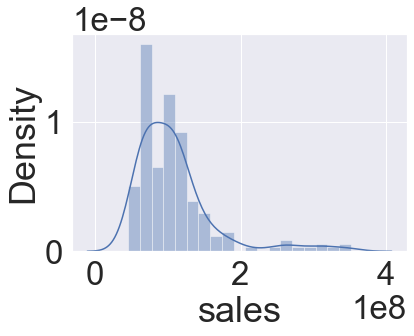

In [38]:
sns.distplot(df['sales'])

<AxesSubplot:>

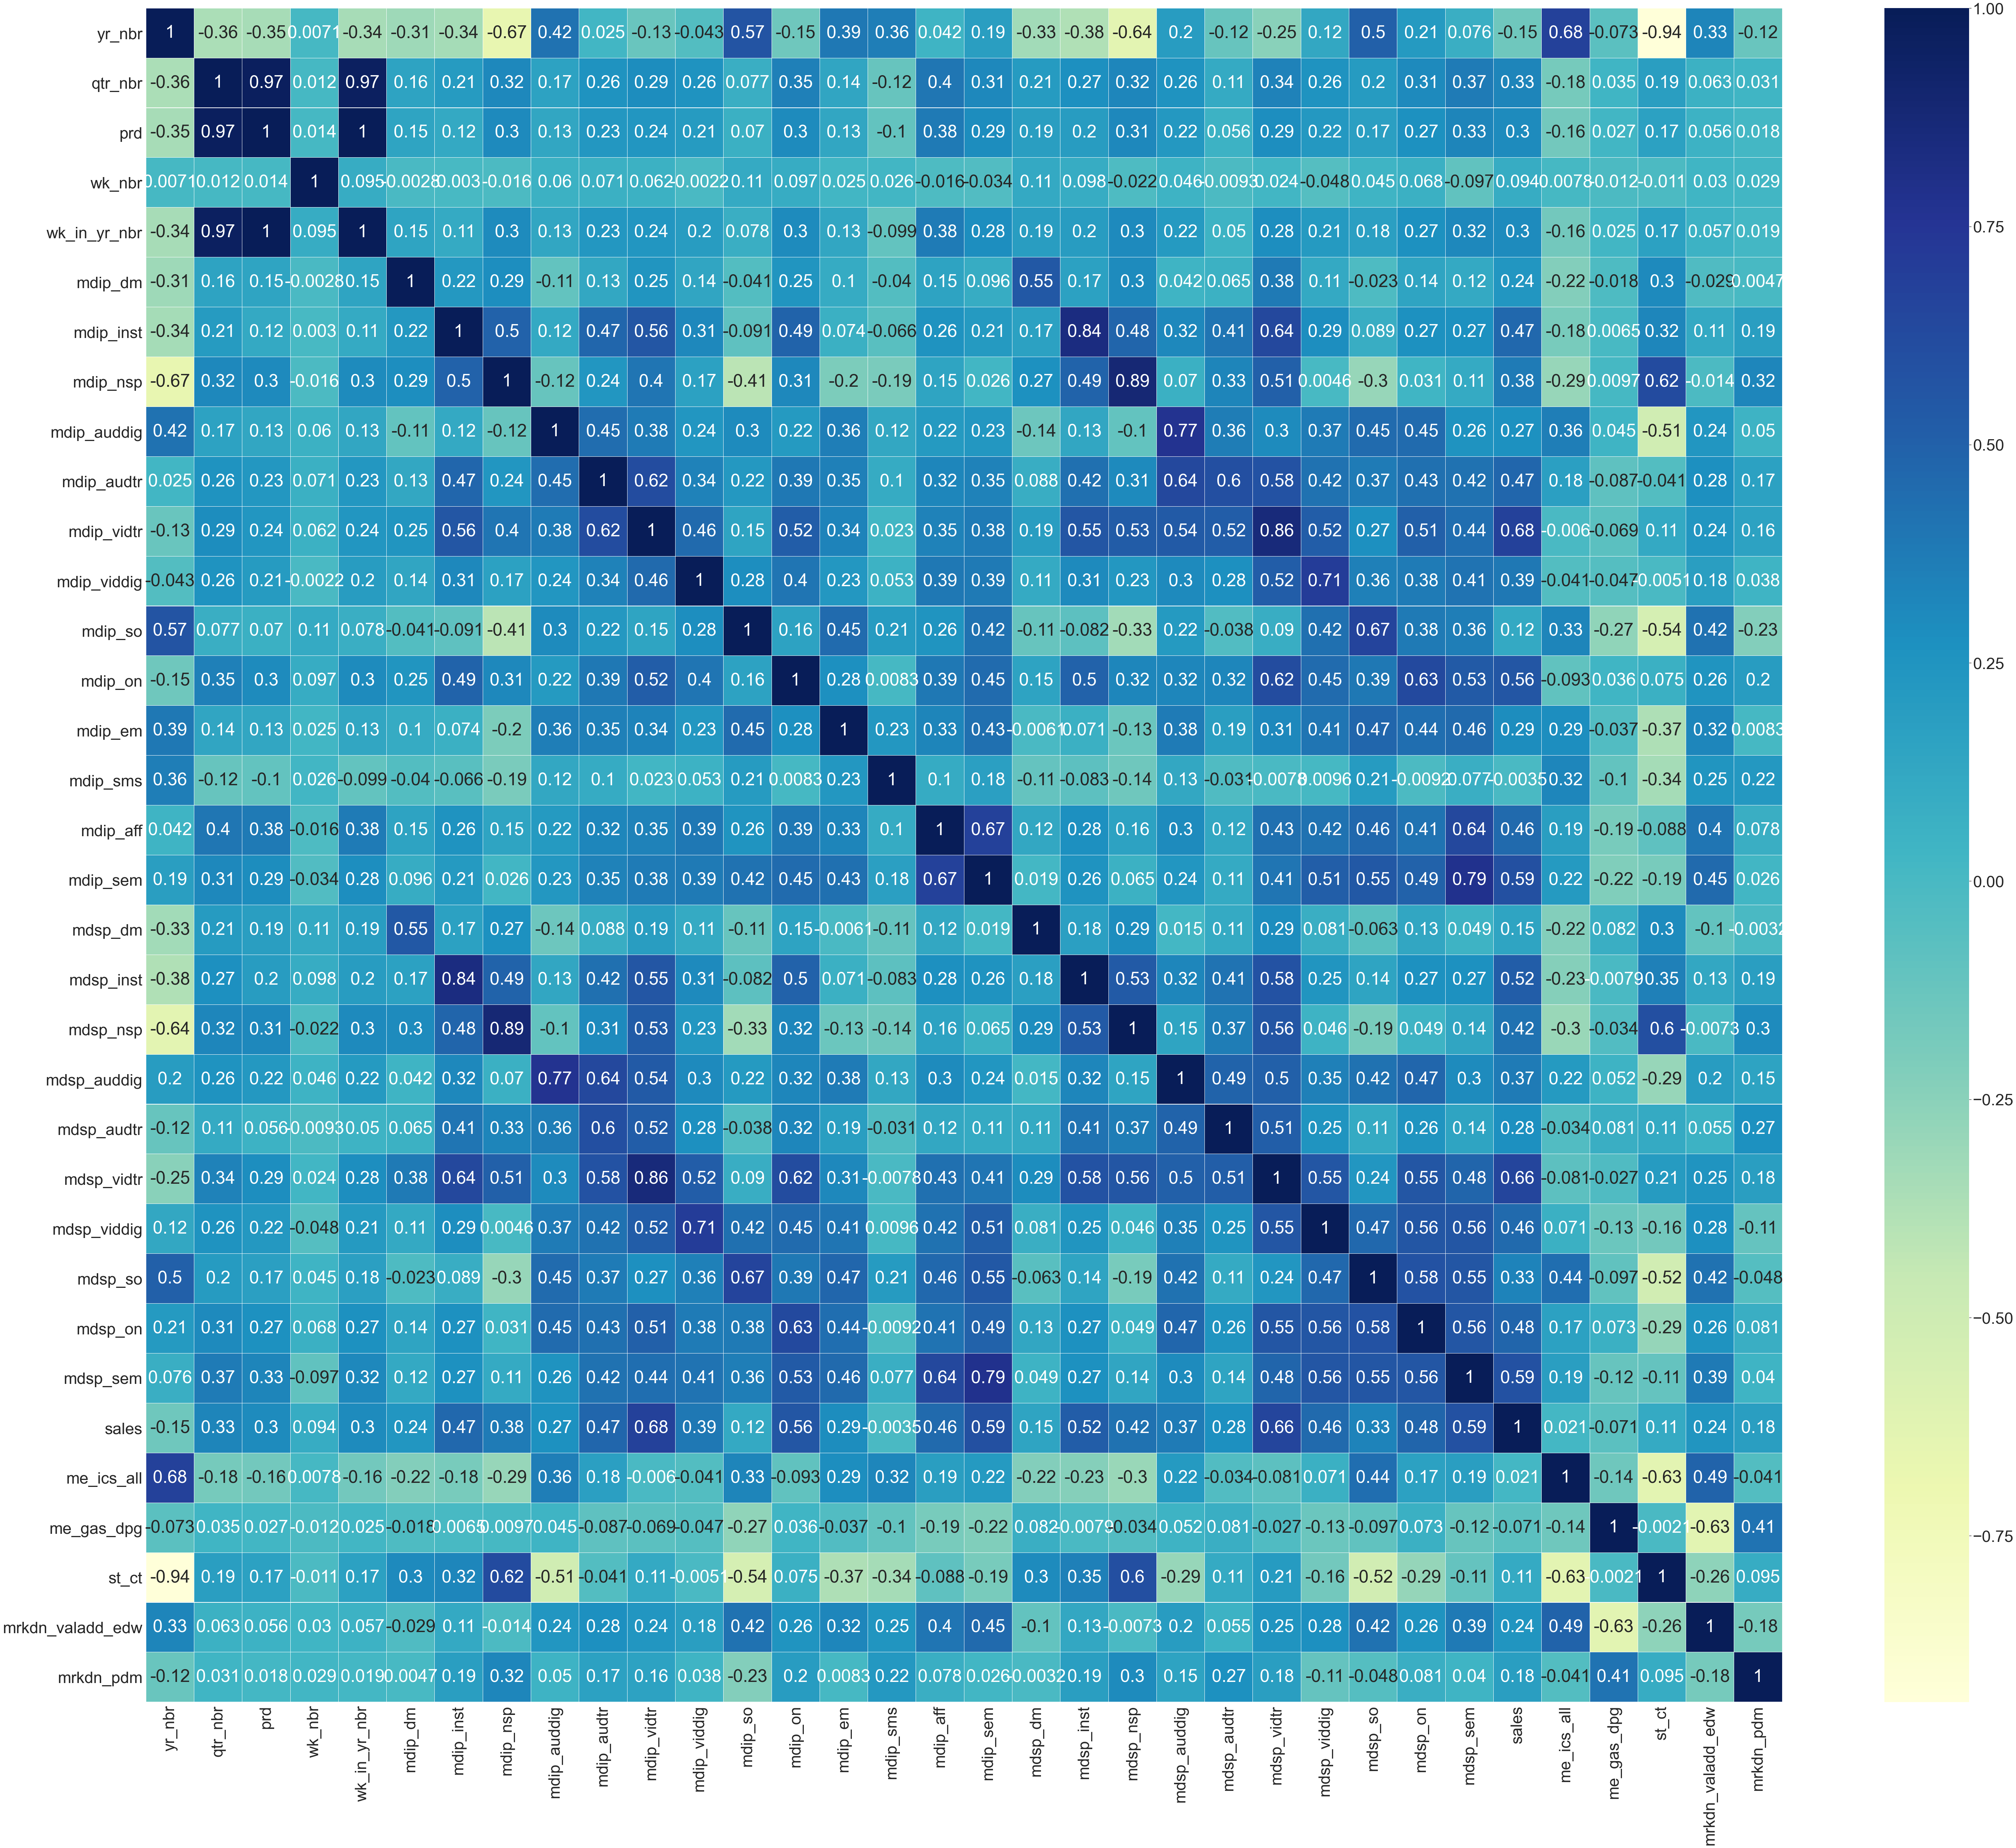

In [40]:
df1 = df.iloc[ : , :34]
sales_corr = df1.corr()
sns.set(font_scale=4)
plt.subplots(figsize=(100,85))

sns.heatmap(sales_corr, cmap='YlGnBu', linewidth=.005, annot=True)

In [41]:
# Create new data frame with relevant dates, sales, spend data
sale_spend = df.loc[:,df.columns.intersection(['wk_strt_dt', 'sales', 'mdsp_dm','mdsp_inst', 'mdsp_nsp','mdsp_auddig', 'mdsp_audtr',
                'mdsp_vidtr', 'mdsp_viddig', 'mdsp_so', 'mdsp_on', 'mdsp_sem'])]

In [42]:
sale_spend.rename(columns={'wk_strt_dt': 'Week_Start', 'sales': 'Sales', 'mdsp_dm' : 'Direct_Mail','mdsp_inst' : 'Insert', 
                           'mdsp_nsp' : 'Newspaper','mdsp_auddig' : 'Digital_Audio', 'mdsp_audtr' : 'Radio', 'mdsp_vidtr' : 'TV',
                           'mdsp_viddig' : 'Digital_Video', 'mdsp_so' : 'Social', 'mdsp_on' : 'Online_Display', 'mdsp_sem' : 'SEM'}, 
                  inplace=True)

In [43]:
print(sale_spend.shape)
sale_spend.head()

(209, 11)


Direct_Mail     Insert  Newspaper  Digital_Audio      Radio  \
wk_strt_dt                                                                
2014-08-03    678410.26  129759.66  507635.16        2700.69  254134.14   
2014-08-10    661097.71   70355.33  625719.37        5039.35  106602.98   
2014-08-17   1874338.43  107720.37  277532.61        2610.93   59011.42   
2014-08-24    306583.37  141708.61  186028.61        6032.91  178010.46   
2014-08-31   2366274.16  160691.30  706694.09        5187.32  144097.56   

                   TV  Digital_Video  Social  Online_Display        SEM  \
wk_strt_dt                                                                
2014-08-03  216725.59       45397.90     0.0        61364.75  355954.51   
2014-08-10  108919.26        2903.36     0.0       132643.90  336306.72   
2014-08-17   74032.19        8110.48     0.0        76741.27  344787.96   
2014-08-24  110995.66        6516.22     0.0       193043.55  365495.11   
2014-08-31  225140.84       19381.12     0.0       249612.89  401789.35   

                  Sales  
wk_strt_dt               
2014-08-03  72051457.64  
2014-08-10  78794770.54  
2014-08-17  70071185.56  
2014-08-24  68642464.59  
2014-08-31  86190784.65

In [44]:
# create lag variables for 1y for revenue and channels to look for seasonality

sale_spend = pd.concat([sale_spend, sale_spend.shift(52).add_suffix('_lag1y')], axis=1)

sale_spend['Sales_lag1w'] = sale_spend['Sales'].shift()
sale_spend['Sales_lag3m'] = sale_spend['Sales'].shift(13)


In [45]:
# Create rolling average variable for 1y, 3m, and 1w for all channel spend 
sale_spend = pd.concat([sale_spend, sale_spend.rolling(1).mean().add_suffix('_p1w'), sale_spend.rolling(13).mean().add_suffix('_p3m'), 
                        sale_spend.rolling(52).mean().add_suffix('_p1y')], axis=1)

In [46]:
print(sale_spend.shape)
sale_spend.head()

(209, 96)


Direct_Mail     Insert  Newspaper  Digital_Audio      Radio  \
wk_strt_dt                                                                
2014-08-03    678410.26  129759.66  507635.16        2700.69  254134.14   
2014-08-10    661097.71   70355.33  625719.37        5039.35  106602.98   
2014-08-17   1874338.43  107720.37  277532.61        2610.93   59011.42   
2014-08-24    306583.37  141708.61  186028.61        6032.91  178010.46   
2014-08-31   2366274.16  160691.30  706694.09        5187.32  144097.56   

                   TV  Digital_Video  Social  Online_Display        SEM  ...  \
wk_strt_dt                                                               ...   
2014-08-03  216725.59       45397.90     0.0        61364.75  355954.51  ...   
2014-08-10  108919.26        2903.36     0.0       132643.90  336306.72  ...   
2014-08-17   74032.19        8110.48     0.0        76741.27  344787.96  ...   
2014-08-24  110995.66        6516.22     0.0       193043.55  365495.11  ...   
2014-08-31  225140.84       19381.12     0.0       249612.89  401789.35  ...   

            Digital_Audio_lag1y_p1y  Radio_lag1y_p1y  TV_lag1y_p1y  \
wk_strt_dt                                                           
2014-08-03                      NaN              NaN           NaN   
2014-08-10                      NaN              NaN           NaN   
2014-08-17                      NaN              NaN           NaN   
2014-08-24                      NaN              NaN           NaN   
2014-08-31                      NaN              NaN           NaN   

            Digital_Video_lag1y_p1y  Social_lag1y_p1y  \
wk_strt_dt                                              
2014-08-03                      NaN               NaN   
2014-08-10                      NaN               NaN   
2014-08-17                      NaN               NaN   
2014-08-24                      NaN               NaN   
2014-08-31                      NaN               NaN   

            Online_Display_lag1y_p1y  SEM_lag1y_p1y  Sales_lag1y_p1y  \
wk_strt_dt                                                             
2014-08-03                       NaN            NaN              NaN   
2014-08-10                       NaN            NaN              NaN   
2014-08-17                       NaN            NaN              NaN   
2014-08-24                       NaN            NaN              NaN   
2014-08-31                       NaN            NaN              NaN   

            Sales_lag1w_p1y  Sales_lag3m_p1y  
wk_strt_dt                                    
2014-08-03              NaN              NaN  
2014-08-10              NaN              NaN  
2014-08-17              NaN              NaN  
2014-08-24              NaN              NaN  
2014-08-31              NaN              NaN  

[5 rows x 96 columns]

In [47]:
pd.set_option('display.max_rows', 100)
sale_spend.dtypes

Direct_Mail                 float64
Insert                      float64
Newspaper                   float64
Digital_Audio               float64
Radio                       float64
TV                          float64
Digital_Video               float64
Social                      float64
Online_Display              float64
SEM                         float64
Sales                       float64
Direct_Mail_lag1y           float64
Insert_lag1y                float64
Newspaper_lag1y             float64
Digital_Audio_lag1y         float64
Radio_lag1y                 float64
TV_lag1y                    float64
Digital_Video_lag1y         float64
Social_lag1y                float64
Online_Display_lag1y        float64
SEM_lag1y                   float64
Sales_lag1y                 float64
Sales_lag1w                 float64
Sales_lag3m                 float64
Direct_Mail_p1w             float64
Insert_p1w                  float64
Newspaper_p1w               float64
Digital_Audio_p1w           

In [48]:
sale_spend = sale_spend.loc[:, ~sale_spend.columns.duplicated()]
sale_spend.drop(['Sales_p1w', 'Sales_p3m', 'Sales_p1y'], axis=1, inplace=True)
sale_spend = sale_spend.loc[:, ~sale_spend.columns.str.endswith('_lag1y_p1w')]
sale_spend = sale_spend.loc[:, ~sale_spend.columns.str.endswith('_lag1y_p3m')]
sale_spend = sale_spend.loc[:, ~sale_spend.columns.str.endswith('_lag1y_p1y')]

In [49]:
print(sale_spend.shape)
sale_spend.head()

(209, 60)


Direct_Mail     Insert  Newspaper  Digital_Audio      Radio  \
wk_strt_dt                                                                
2014-08-03    678410.26  129759.66  507635.16        2700.69  254134.14   
2014-08-10    661097.71   70355.33  625719.37        5039.35  106602.98   
2014-08-17   1874338.43  107720.37  277532.61        2610.93   59011.42   
2014-08-24    306583.37  141708.61  186028.61        6032.91  178010.46   
2014-08-31   2366274.16  160691.30  706694.09        5187.32  144097.56   

                   TV  Digital_Video  Social  Online_Display        SEM  ...  \
wk_strt_dt                                                               ...   
2014-08-03  216725.59       45397.90     0.0        61364.75  355954.51  ...   
2014-08-10  108919.26        2903.36     0.0       132643.90  336306.72  ...   
2014-08-17   74032.19        8110.48     0.0        76741.27  344787.96  ...   
2014-08-24  110995.66        6516.22     0.0       193043.55  365495.11  ...   
2014-08-31  225140.84       19381.12     0.0       249612.89  401789.35  ...   

            Newspaper_p1y  Digital_Audio_p1y  Radio_p1y  TV_p1y  \
wk_strt_dt                                                        
2014-08-03            NaN                NaN        NaN     NaN   
2014-08-10            NaN                NaN        NaN     NaN   
2014-08-17            NaN                NaN        NaN     NaN   
2014-08-24            NaN                NaN        NaN     NaN   
2014-08-31            NaN                NaN        NaN     NaN   

            Digital_Video_p1y  Social_p1y  Online_Display_p1y  SEM_p1y  \
wk_strt_dt                                                               
2014-08-03                NaN         NaN                 NaN      NaN   
2014-08-10                NaN         NaN                 NaN      NaN   
2014-08-17                NaN         NaN                 NaN      NaN   
2014-08-24                NaN         NaN                 NaN      NaN   
2014-08-31                NaN         NaN                 NaN      NaN   

            Sales_lag1w_p1y  Sales_lag3m_p1y  
wk_strt_dt                                    
2014-08-03              NaN              NaN  
2014-08-10              NaN              NaN  
2014-08-17              NaN              NaN  
2014-08-24              NaN              NaN  
2014-08-31              NaN              NaN  

[5 rows x 60 columns]

In [50]:
#Drop 1st year data
sale_spend = sale_spend[53:len(sale_spend)]

In [52]:
print(sale_spend.shape)
sale_spend.head()

(156, 60)


Direct_Mail     Insert  Newspaper  Digital_Audio      Radio  \
wk_strt_dt                                                                
2015-08-09    416160.76   77698.33  459923.73        3942.06   96550.71   
2015-08-16   1474306.52  106188.92  247435.73        2097.17  132930.04   
2015-08-23    527024.17  104125.45  181933.38        1800.33   70754.33   
2015-08-30    673751.13  138373.84  121351.78        2083.53  155625.84   
2015-09-06   1448011.10  154866.35  677627.88        3406.89  233850.55   

                   TV  Digital_Video    Social  Online_Display        SEM  \
wk_strt_dt                                                                  
2015-08-09  114713.91       10588.33  15138.28       129329.71  482111.74   
2015-08-16   57893.16       10309.24  15138.28        61538.94  350792.50   
2015-08-23   49519.84       21659.02  25951.34       137532.34  565924.44   
2015-08-30  149631.97       14295.41  21498.85       186763.14  353038.61   
2015-09-06  297784.55       12318.68  32107.14       235416.66  319188.04   

            ...  Newspaper_p1y  Digital_Audio_p1y      Radio_p1y  \
wk_strt_dt  ...                                                    
2015-08-09  ...  511178.403077        3106.448846  131415.502308   
2015-08-16  ...  510599.616923        3096.568846  132837.014231   
2015-08-23  ...  510520.862500        3015.173077  130774.396346   
2015-08-30  ...  499264.279615        2955.484808  130996.094038   
2015-09-06  ...  504204.427885        2959.425000  132401.396923   

                   TV_p1y  Digital_Video_p1y    Social_p1y  \
wk_strt_dt                                                   
2015-08-09  202613.926538        9886.259038  23690.176346   
2015-08-16  202303.560577        9928.542885  23981.297115   
2015-08-23  201121.333269       10219.750577  24480.361346   
2015-08-30  199669.239615       10121.948462  24893.800769   
2015-09-06  203240.843846        9992.733846  25511.245769   

            Online_Display_p1y        SEM_p1y  Sales_lag1w_p1y  \
wk_strt_dt                                                       
2015-08-09       174269.543654  472929.162885     1.113027e+08   
2015-08-16       173977.191154  473044.634808     1.123788e+08   
2015-08-23       172909.667885  476899.045000     1.121864e+08   
2015-08-30       171701.018846  475961.530769     1.130856e+08   
2015-09-06       173225.469808  476206.123846     1.127687e+08   

            Sales_lag3m_p1y  
wk_strt_dt                   
2015-08-09              NaN  
2015-08-16              NaN  
2015-08-23              NaN  
2015-08-30              NaN  
2015-09-06              NaN  

[5 rows x 60 columns]

<AxesSubplot:>

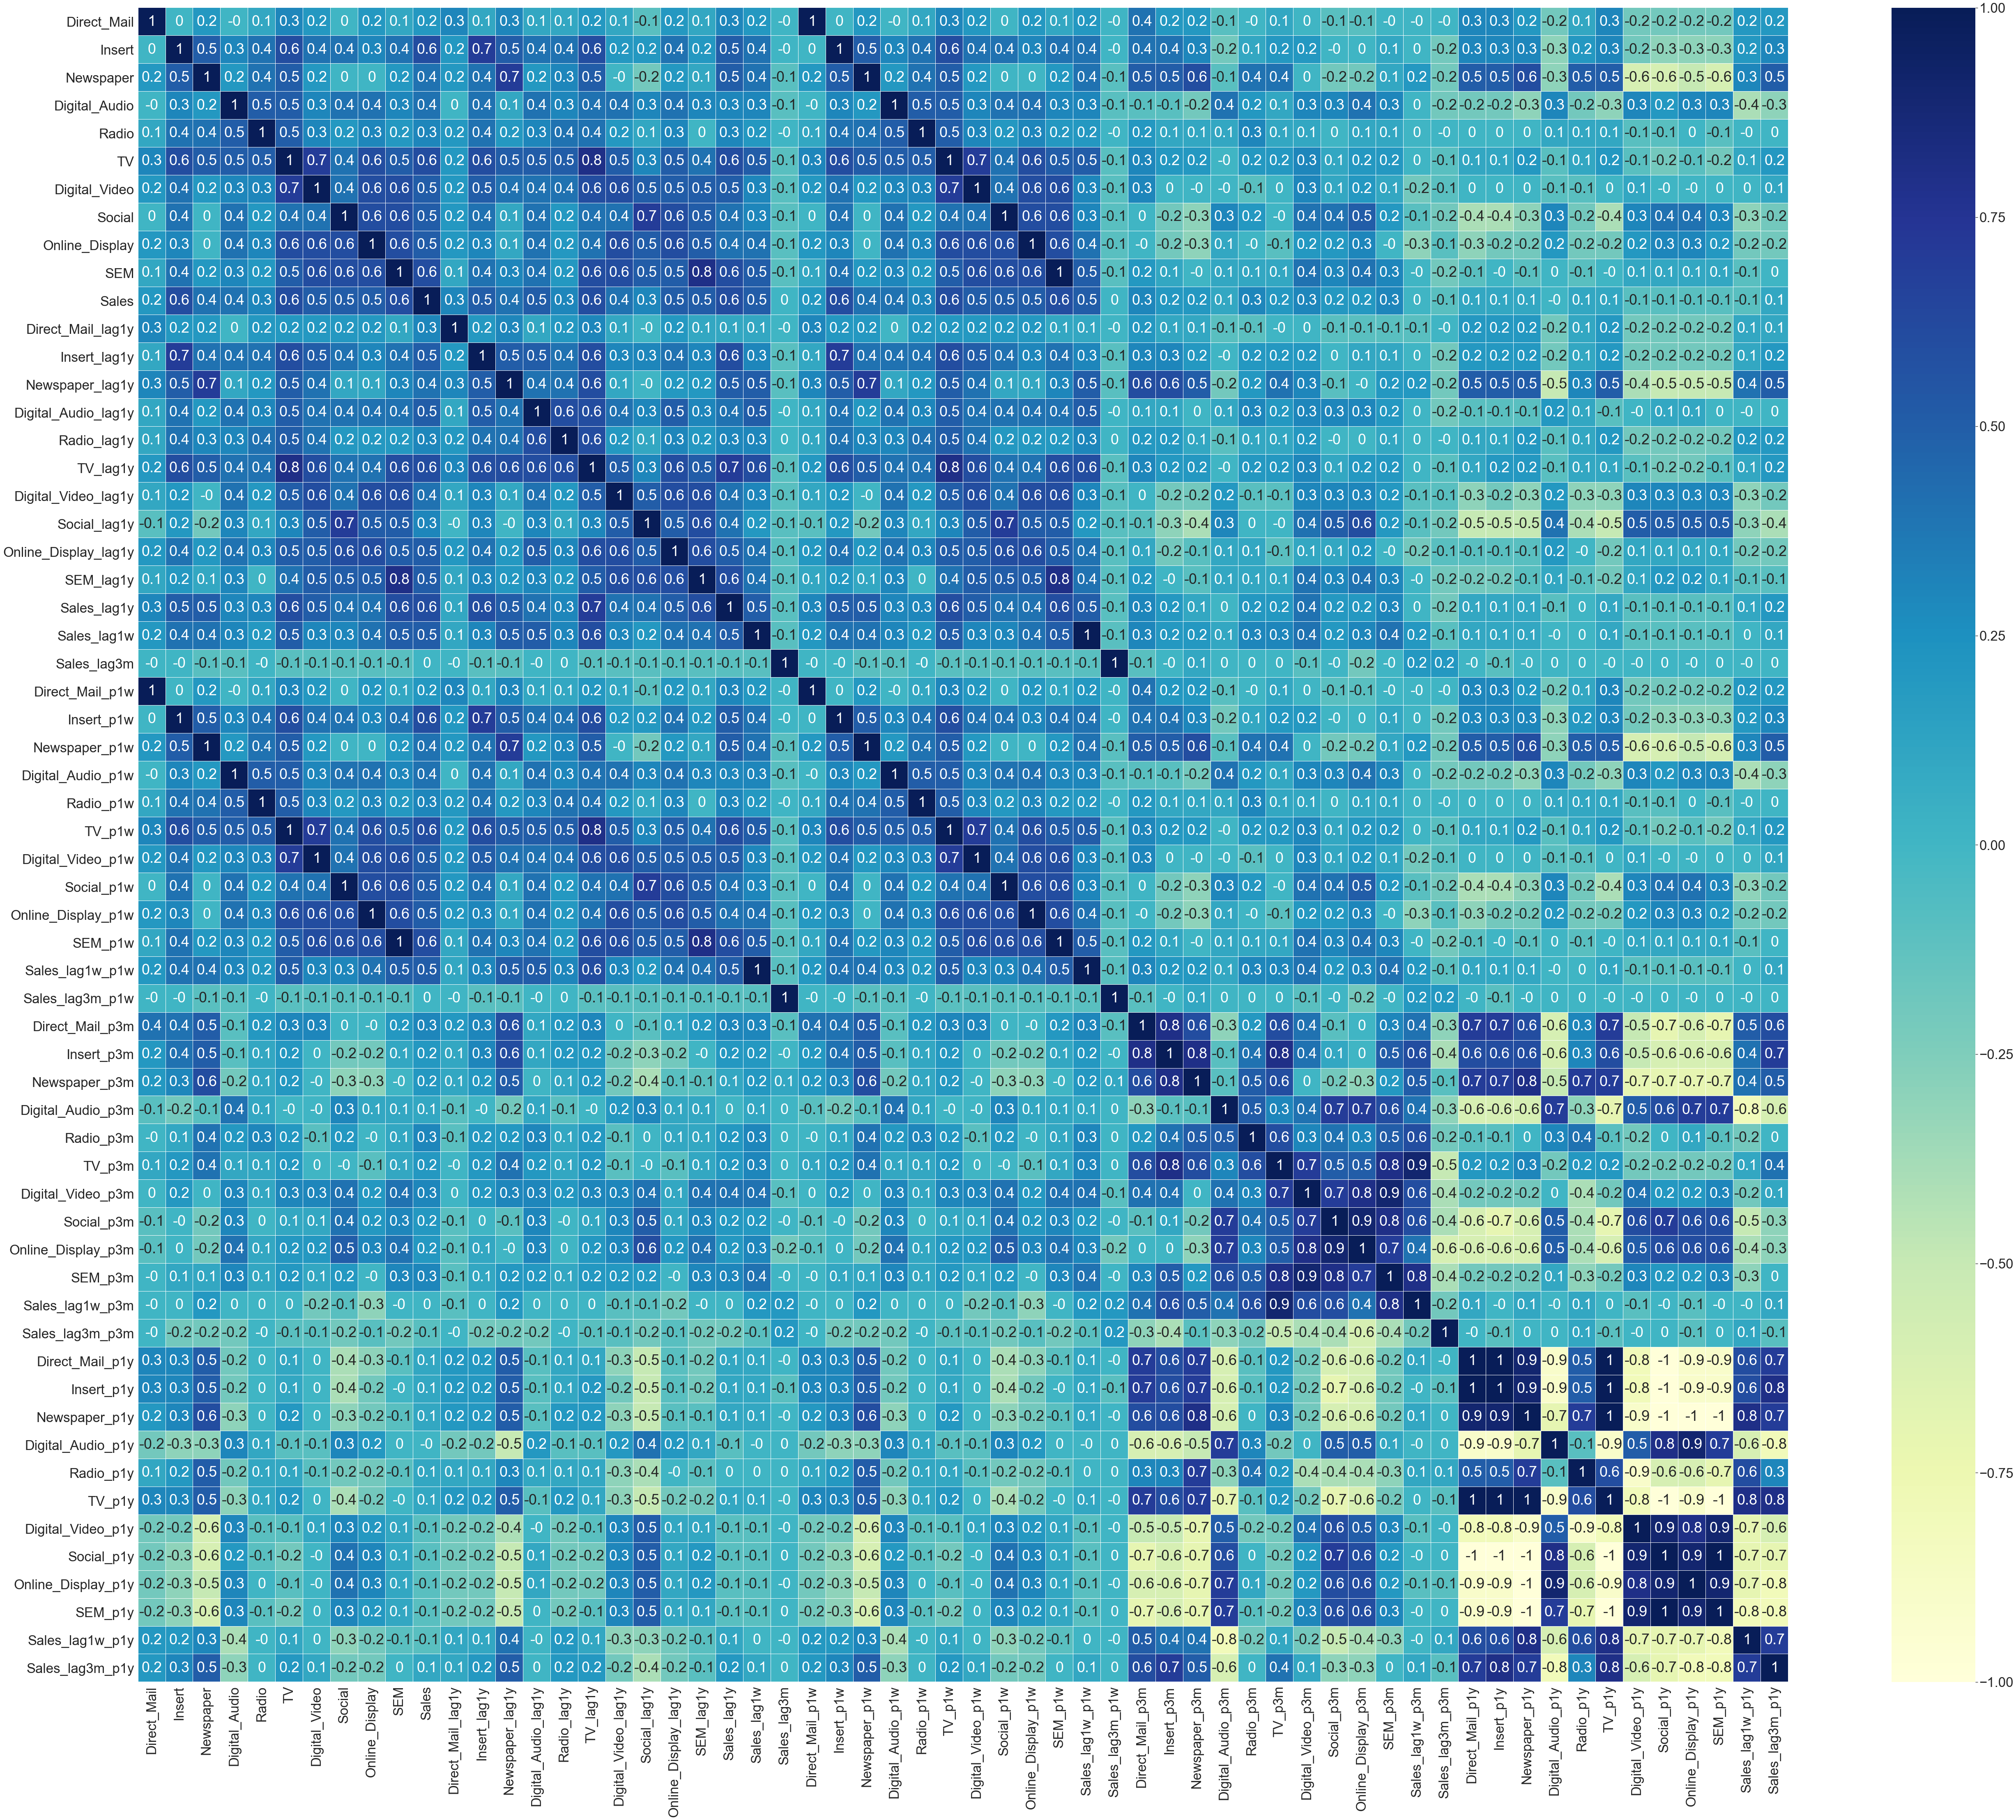

In [53]:
sales_corr = round(sale_spend.corr(), 1)
sns.set(font_scale=3)
plt.subplots(figsize=(90,75))

sns.heatmap(sales_corr, cmap='YlGnBu', linewidth=.005, annot=True)

In [70]:
#Check for nulls and only print columns that contain nulls
missing_data = sale_spend.isnull().sum()

In [71]:
missing_data

Direct_Mail              0
Insert                   0
Newspaper                0
Digital_Audio            0
Radio                    0
TV                       0
Digital_Video            0
Social                   0
Online_Display           0
SEM                      0
Sales                    0
Direct_Mail_lag1y        0
Insert_lag1y             0
Newspaper_lag1y          0
Digital_Audio_lag1y      0
Radio_lag1y              0
TV_lag1y                 0
Digital_Video_lag1y      0
Social_lag1y             0
Online_Display_lag1y     0
SEM_lag1y                0
Sales_lag1y              0
Sales_lag1w              0
Sales_lag3m              0
Direct_Mail_p1w          0
Insert_p1w               0
Newspaper_p1w            0
Digital_Audio_p1w        0
Radio_p1w                0
TV_p1w                   0
Digital_Video_p1w        0
Social_p1w               0
Online_Display_p1w       0
SEM_p1w                  0
Sales_lag1w_p1w          0
Sales_lag3m_p1w          0
Direct_Mail_p3m          0
I

In [75]:
sale_spend = sale_spend.dropna()
sale_spend.shape

(145, 60)

In [74]:
y = sale_spend['Sales']
X1 = sale_spend.loc[:, sale_spend.columns != 'Sales']
X = X1.loc[:, X1.columns != 'Week_Start']

regr = linear_model.LinearRegression()
regr.fit(X,y)

LinearRegression()

In [76]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"] = X.columns

C:\Users\djdit\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [77]:
vif.round(1)

VIF Factor              features
0          inf           Direct_Mail
1          inf                Insert
2          inf             Newspaper
3          inf         Digital_Audio
4          inf                 Radio
5          inf                    TV
6          inf         Digital_Video
7          inf                Social
8          inf        Online_Display
9          inf                   SEM
10         6.5     Direct_Mail_lag1y
11        11.6          Insert_lag1y
12         9.8       Newspaper_lag1y
13        12.9   Digital_Audio_lag1y
14        11.8           Radio_lag1y
15        23.2              TV_lag1y
16        10.0   Digital_Video_lag1y
17        14.8          Social_lag1y
18        21.8  Online_Display_lag1y
19        18.7             SEM_lag1y
20        23.7           Sales_lag1y
21         inf           Sales_lag1w
22         inf           Sales_lag3m
23         inf       Direct_Mail_p1w
24         inf            Insert_p1w
25         inf         Newspaper_p1w
26         inf     Digital_Audio_p1w
27         inf             Radio_p1w
28         inf                TV_p1w
29         inf     Digital_Video_p1w
30         inf            Social_p1w
31         inf    Online_Display_p1w
32         inf               SEM_p1w
33         inf       Sales_lag1w_p1w
34         inf       Sales_lag3m_p1w
35       511.2       Direct_Mail_p3m
36       558.4            Insert_p3m
37       165.0         Newspaper_p3m
38       508.5     Digital_Audio_p3m
39       653.6             Radio_p3m
40       852.1                TV_p3m
41       501.9     Digital_Video_p3m
42       357.6            Social_p3m
43       836.0    Online_Display_p3m
44       627.0               SEM_p3m
45      2766.4       Sales_lag1w_p3m
46       251.2       Sales_lag3m_p3m
47      8426.8       Direct_Mail_p1y
48      7633.2            Insert_p1y
49      2973.9         Newspaper_p1y
50      4859.0     Digital_Audio_p1y
51     11587.5             Radio_p1y
52     14782.5                TV_p1y
53      5788.4     Digital_Video_p1y
54      4434.5            Social_p1y
55     14279.7    Online_Display_p1y
56     18557.8               SEM_p1y
57     47703.5       Sales_lag1w_p1y
58     19147.6       Sales_lag3m_p1y